## Portfolio Management Lecture 01 (WIP)
### Fundamentals of Risk & Return

In [1]:
# Importing the required libraries
import numpy as np # Basic operations
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization 
from openbb import obb # Market Data Retrieval
obb.user.preferences.output_type = 'dataframe'

### Getting Market Data
There are several data providers of financial-data but I find OpenBB to be perfect for individuals. We'll now download 25 Years of market data to get an idea of expected return and risk of two assets:

- The S&P 500 (SPY) is an tracking the performance of the 500 largest companies listed on stock exchanges in the United States.

- The Russel 200 (RUT) is used is used to track 2000 US Small Cap Stock. 

The capitalization of a business is just the product between the number of shares and the market price. 

In [4]:
data = obb.equity.price.historical('SPY,^RUT',
                                  start_date = '2000-01-01',
                                  end_date = '2025-01-01',
                                  interval = '1M',
                                  provider = 'yfinance')
data.head() 

,open,high,low,close,volume,dividend,symbol
date,,,,,,,
2000-01-01,148.250000,148.250000,135.000000,139.562500,156770800,0.000,SPY
2000-01-01,504.760010,540.599976,467.559998,496.230011,21494400000,0.000,^RUT
2000-02-01,139.750000,144.562500,132.718750,137.437500,186938300,0.000,SPY
2000-02-01,496.230011,577.719971,492.649994,577.710022,20912000000,0.000,^RUT
2000-03-01,137.625000,155.750000,135.031250,150.375000,247594900,0.371,SPY


In [5]:
# Data Manipulation 
prices = data.pivot(columns = 'symbol', values = 'close')
prices.columns = ['S&P 500', 'Russell 2000']
prices.head()

,S&P 500,Russell 2000
date,,
2000-01-01,139.56250,496.230011
2000-02-01,137.43750,577.710022
2000-03-01,150.37500,539.090027
2000-04-01,145.09375,506.250000
2000-05-01,142.81250,476.179993


In [6]:
# Computing Financial Returns 
rets = prices.pct_change()[1:]
rets 

,S&P 500,Russell 2000
date,,
2000-02-01,-0.015226,0.164198
2000-03-01,0.094134,-0.066850
2000-04-01,-0.035121,-0.060918
2000-05-01,-0.015723,-0.059398
2000-06-01,0.017287,0.086207
...,...,...
2024-09-01,0.017883,0.005565
2024-10-01,-0.008924,-0.014942
2024-11-01,0.059633,0.108383


In [18]:
# Computing total return
total_return = (1+rets).cumprod() -1 

print(
    f"""
      The Total Return for the S&P 500 is: {round(total_return.iloc[-1]['S&P 500'] * 100, 2)}%
      The Total Return for the Russell 2000 is: {round(total_return.iloc[-1]['Russell 2000'] * 100, 2)}%
      """
      )


      The Total Return for the S&P 500 is: 331.22%
      The Total Return for the Russell 2000 is: 361.01%
      


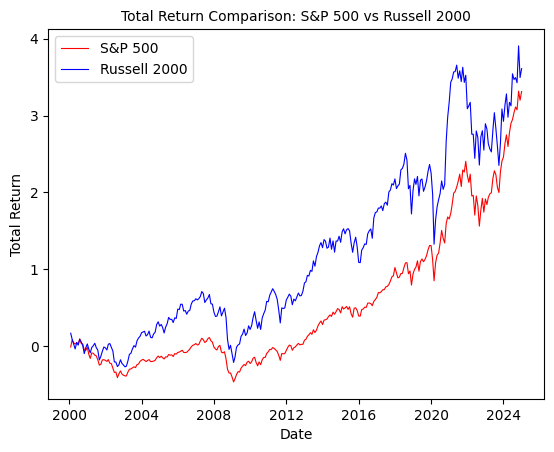

In [19]:
# Visualizing the Total Return
plt.plot(total_return['S&P 500'],
         label='S&P 500',
         linewidth= 0.8,
         color='red')

plt.plot(total_return['Russell 2000'],
         label='Russell 2000',
         linewidth= 0.8,
         color='blue')


plt.title('Total Return Comparison: S&P 500 vs Russell 2000', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Total Return')
plt.legend() 

One can notice that small-cap stocks tend to produce higher returns. This relation helps us define: **The risk-return tradeoff**. A simple rule according to which the potential return tends to rise with an increase in risk

### Computing Annualized Returns
For better comparison it is useful to compute annualized returns. The annualized return represents the geometric mean annual return over the investment period. 


In [21]:

n_obs = rets.shape[0]
annualized_ret = (rets+1).prod()**(252/n_obs) - 1
annualized_ret

S&P 500         2.413078
Russell 2000    2.610105
dtype: float64

### Computing Annualized Vol

In [24]:
n = 12 
annualized_vol = rets.std() * np.sqrt(n)
annualized_vol 

S&P 500         0.153202
Russell 2000    0.204948
dtype: float64

In [25]:
# Computing risk-adjusted return 
rfr = 0.02 # Risk-Free Rate 
sharpe_ratio = (annualized_ret - rfr) / annualized_vol 
sharpe_ratio  

S&P 500         15.620377
Russell 2000    12.637864
dtype: float64